# RMF анализ в Python
1. [Подготовка и загрузка данных](#Libraries)
1. [Первичный анализ данныъ](#FirstStep)
1. [Подготовка и загрузка данных](#Tables) 
1. [Отчет и визуализация](#Report)

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import datetime as dt
import datetime
import numpy as np

In [29]:
data = pd.read_excel(r'Online Retail.xlsx')

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [31]:
%time
data.head()

Wall time: 0 ns


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [32]:
data.Country.value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

# Первычный анализ

In [33]:
#Возьмите любые две страны, которые вам интересно исследовать.
countG= data.loc[data['Country'] == 'Germany']
countF= data.loc[data['Country'] == 'France']
countG.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1109,536527,22809,SET OF 6 T-LIGHTS SANTA,6,2010-12-01 13:04:00,2.95,12662.0,Germany
1110,536527,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6,2010-12-01 13:04:00,2.55,12662.0,Germany
1111,536527,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,12,2010-12-01 13:04:00,0.85,12662.0,Germany
1112,536527,22242,5 HOOK HANGER MAGIC TOADSTOOL,12,2010-12-01 13:04:00,1.65,12662.0,Germany
1113,536527,22244,3 HOOK HANGER MAGIC GARDEN,12,2010-12-01 13:04:00,1.95,12662.0,Germany


In [34]:
countG.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1109,536527,22809,SET OF 6 T-LIGHTS SANTA,6,2010-12-01 13:04:00,2.95,12662.0,Germany
1110,536527,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6,2010-12-01 13:04:00,2.55,12662.0,Germany
1111,536527,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,12,2010-12-01 13:04:00,0.85,12662.0,Germany
1112,536527,22242,5 HOOK HANGER MAGIC TOADSTOOL,12,2010-12-01 13:04:00,1.65,12662.0,Germany
1113,536527,22244,3 HOOK HANGER MAGIC GARDEN,12,2010-12-01 13:04:00,1.95,12662.0,Germany


In [35]:
#Топ-3 продукта (чаще всего покупают) для каждой страны.
top_3_desF= list(countF.Description.value_counts().index[0:3])
top_3_desG= list(countG.Description.value_counts().index[0:3])
print(top_3_desF)
print(top_3_desG)

['POSTAGE', 'RABBIT NIGHT LIGHT', 'RED TOADSTOOL LED NIGHT LIGHT']
['POSTAGE', 'ROUND SNACK BOXES SET OF4 WOODLAND ', 'REGENCY CAKESTAND 3 TIER']


In [36]:
top_3_desG= list(countG.Description.value_counts().index[0:3])
top_3_desG

['POSTAGE', 'ROUND SNACK BOXES SET OF4 WOODLAND ', 'REGENCY CAKESTAND 3 TIER']

In [37]:
#День или месяц, когда покупали больше всего. Напишите идеи, почему именно в эти дни.
DateF= list(countF.InvoiceDate.dt.month.value_counts().index[0:1])
DateF

[11]

In [38]:
DateG=list(countG.InvoiceDate.dt.month.value_counts().index[0:1])
DateG

[10]

In [39]:
# Топ-3 пользователя по количеству покупок или по сумме покупок.
#Что это были за покупки? Можно ли сделать какие-то выводы?
CustomеrF=countF.groupby(['CustomerID','Description'])['UnitPrice'].sum().sort_values(ascending
= False).head(3)
CustomеrF

CustomerID  Description
12536.0     Manual         12493.42
12669.0     Manual          2272.60
12678.0     POSTAGE          641.00
Name: UnitPrice, dtype: float64

In [40]:
CustomеrG=countG.groupby(['CustomerID','Description'])['UnitPrice'].sum().sort_values(ascending
= False).head(3)
CustomеrG

CustomerID  Description
12473.0     Manual         2068.18
13810.0     Manual         1199.00
12471.0     POSTAGE         822.00
Name: UnitPrice, dtype: float64

In [41]:
#Средний чек/среднее количество покупок/средняя выручка
print(countG.UnitPrice.agg(['mean']))
print(countG.Quantity.agg(['mean']))

mean    3.96693
Name: UnitPrice, dtype: float64
mean    12.369458
Name: Quantity, dtype: float64


In [42]:
#средняя выручка
countG['AveregG'] = countG['UnitPrice']*countG['Quantity']
countG['AveregG'].mean()

C:\Users\Admin\AppData\Local\Temp/ipykernel_2960/2707489201.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countG['AveregG'] = countG['UnitPrice']*countG['Quantity']


23.348942601368996

In [43]:
#Выручка - средняя и наибольшая. 
#Вы можете назвать топ-5 продуктов, которые принесли наибольшую выручку?
countG.groupby('Description')['AveregG'].sum().sort_values(ascending=False).head(5)

Description
POSTAGE                                20821.00
REGENCY CAKESTAND 3 TIER                8257.35
ROUND SNACK BOXES SET OF4 WOODLAND      3554.70
ROUND SNACK BOXES SET OF 4 FRUITS       1949.95
SPACEBOY LUNCH BOX                      1629.45
Name: AveregG, dtype: float64

In [44]:
#Используя код, полученный на уроке, сделайте RFM-анализ для каждой страны.
#Результатом должны быть табличка и визуализация (New/Existed) - для каждой страны
#Я рекомендую вам "обернуть" все расчеты в функции - тогда вам не придеться повторять действия.


# RFM-анализ для каждой страны.

In [45]:
#Используя код, полученный на уроке, сделайте RFM-анализ для каждой страны.
#Результатом должны быть табличка и визуализация (New/Existed) - для каждой страны
#Я рекомендую вам "обернуть" все расчеты в функции - тогда вам не придеться повторять действия.


In [46]:
# время отчетного периодв
now = datetime.date(2012, 1, 1)
print(now)

2012-01-01


In [47]:
{'Recency':{0.25:387.0,0.50:401.0,0.75:401.0},
 'Monetray':{0.50:477.605,0.50:1013.260,0.75:3031.520},
 'Frecuency':{0.25:22.5,0.50:53.0,0.75:143.0}}

{'Recency': {0.25: 387.0, 0.5: 401.0, 0.75: 401.0},
 'Monetray': {0.5: 1013.26, 0.75: 3031.52},
 'Frecuency': {0.25: 22.5, 0.5: 53.0, 0.75: 143.0}}

In [48]:
def Rscore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif  x <= d[p][0.5]:
        return 2
    elif  x <= d[p][0.75]:
        return 3
    else:
        return 4


In [49]:
def Mscore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif  x <= d[p][0.5]:
        return 2
    elif  x <= d[p][0.75]:
        return 3
    else:
        return 4


In [50]:
def Fscore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif  x <= d[p][0.5]:
        return 2
    elif  x <= d[p][0.75]:
        return 3
    else:
        return 4


In [51]:
# функция квантели для оценки 
def quantileRFM(country):
    quantile = country.quantile(q=[0.25,0.50,0.75])
    country['R-score']=country['Recency'].apply(Rscore,args =('Recency',quantile,))
    country['M-score']=country['Monetray'].apply(Mscore,args =('Monetray',quantile,))
    country['F-score']=country['Frecuency'].apply(Fscore,args =('Frecuency',quantile,))
    
    return country

In [52]:
# содаем таблички
def funcRFM(countryName):
    country = data.loc[data['Country'] == countryName]
    country['Total'] = country['UnitPrice']*country['Quantity']
    country['Date']= pd.DatetimeIndex(country['InvoiceDate']).date
    rw_recency = country.groupby(by = 'CustomerID', as_index=False)['Date'].max()
    rw_recency['Recency'] =rw_recency['Date'].apply(lambda x:(now-x).days)
    rw_frecuency = country.groupby(by = 'CustomerID', as_index=False)['InvoiceNo'].count()
    rw_frecuency.columns = ['CustomerID','Frecuency']
    rw_monetray = country.groupby(by = 'CustomerID', as_index=False)['Total'].sum()
    rw_monetray.columns =['CustomerID','Monetray']
    RM = pd.merge(rw_recency,rw_monetray)
    RMF= pd.merge(RM,rw_frecuency)
    country =  quantileRFM(RMF)
    country['RFM_Score'] = country['R-score']+country['F-score']+country['M-score']
    country['RFM_Score'] *= 0.50
    country = country.round(2)
    country[['CustomerID', 'RFM_Score']].head(20)
    country["Customer_segment"] = np.where(country['RFM_Score'] > 4.5, "Top Customers",
        (np.where(country['RFM_Score'] > 4,"High value Customer",
        (np.where( country['RFM_Score'] > 2.5,"Medium Value Customer",
        np.where(country['RFM_Score'] > 1.6,'Low Value Customers', 'Lost Customers'))))))
    plt.pie(country.Customer_segment.value_counts(),
        labels=country.Customer_segment.value_counts().index, autopct='%.0f%%')
    plt.show()
    return country

C:\Users\Admin\AppData\Local\Temp/ipykernel_2960/3752994101.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country['Total'] = country['UnitPrice']*country['Quantity']
C:\Users\Admin\AppData\Local\Temp/ipykernel_2960/3752994101.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country['Date']= pd.DatetimeIndex(country['InvoiceDate']).date


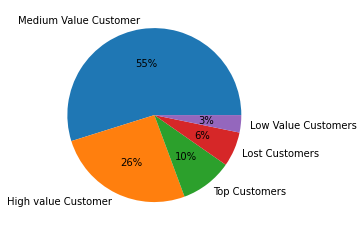

,CustomerID,Date,Recency,Monetray,Frecuency,R-score,M-score,F-score,RFM_Score,Customer_segment
0,12354.0,2011-04-21,255,1079.40,58,4,3,3,5.0,Top Customers
1,12417.0,2011-04-28,248,436.30,23,4,2,2,4.0,Medium Value Customer
2,12421.0,2011-11-24,38,806.27,46,1,2,3,3.0,Medium Value Customer
3,12442.0,2011-12-06,26,172.06,12,1,1,1,1.5,Lost Customers
4,12445.0,2011-11-17,45,133.40,4,1,1,1,1.5,Lost Customers
5,12448.0,2011-10-26,67,449.45,22,2,2,2,3.0,Medium Value Customer
6,12450.0,2011-07-06,179,197.88,8,4,1,1,3.0,Medium Value Customer
7,12454.0,2011-10-17,76,0.00,30,3,1,2,3.0,Medium Value Customer
8,12455.0,2011-09-27,96,767.96,48,3,2,3,4.0,Medium Value Customer
9,12462.0,2011-12-07,25,1124.01,72,1,3,4,4.0,Medium Value Customer


In [53]:
country = funcRFM('Germany')
country

C:\Users\Admin\AppData\Local\Temp/ipykernel_2960/3752994101.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country['Total'] = country['UnitPrice']*country['Quantity']
C:\Users\Admin\AppData\Local\Temp/ipykernel_2960/3752994101.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country['Date']= pd.DatetimeIndex(country['InvoiceDate']).date


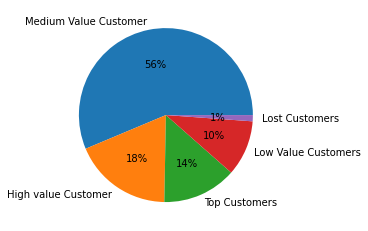

,CustomerID,Date,Recency,Monetray,Frecuency,R-score,M-score,F-score,RFM_Score,Customer_segment
0,12413.0,2011-10-04,89,694.15,40,3,2,2,3.5,Medium Value Customer
1,12437.0,2011-12-08,24,4896.66,201,1,4,4,4.5,High value Customer
2,12441.0,2010-12-08,389,173.55,11,4,1,1,3.0,Medium Value Customer
3,12488.0,2011-11-30,32,1298.66,55,1,3,3,3.5,Medium Value Customer
4,12489.0,2011-01-07,359,334.93,15,4,1,1,3.0,Medium Value Customer
...,...,...,...,...,...,...,...,...,...,...
82,12734.0,2010-12-22,375,110.40,4,4,1,1,3.0,Medium Value Customer
83,12735.0,2011-01-28,338,779.57,43,4,2,2,4.0,Medium Value Customer
84,12736.0,2011-01-11,355,234.00,4,4,1,1,3.0,Medium Value Customer
85,12740.0,2011-10-07,86,427.60,27,3,2,2,3.5,Medium Value Customer


In [54]:
country2 = funcRFM('France')
country2